# Semana 2
## Tarea 8

**When is it appropriate to use the Kolmogorov-Smirnov test instead of the Shapiro-Wilk test?**

La prueba de K-S es una prueba más general que compara la distribución de una muestra con una distribución de referencia cualquiera (ya sea exponencial, unirforme, etc.). En otras palabras, se usa esta prueba cuando se quiere probar si los datos siguen otra distribución teórica distinta a la normal. También es usada cuando las muestras son muy grandes. 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [4]:
#Lectura de datos desde un archivo CSV
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)
file_name = "Terminos_lagoon_TA_DIC_2023_RawData.csv"
df = import_csv(file_name)
print ("Primeras columnas del DataFrame:")
print (df.head())

Primeras columnas del DataFrame:
   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0  

In [5]:
df = import_csv ("Terminos_lagoon_TA_DIC_2023_RawData.csv")


=== dic_micromol_kg ===


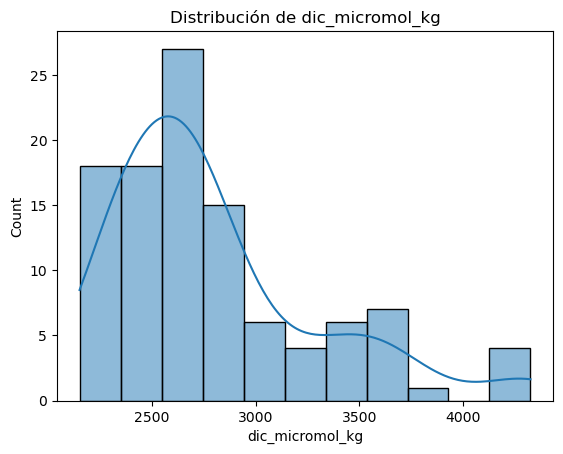

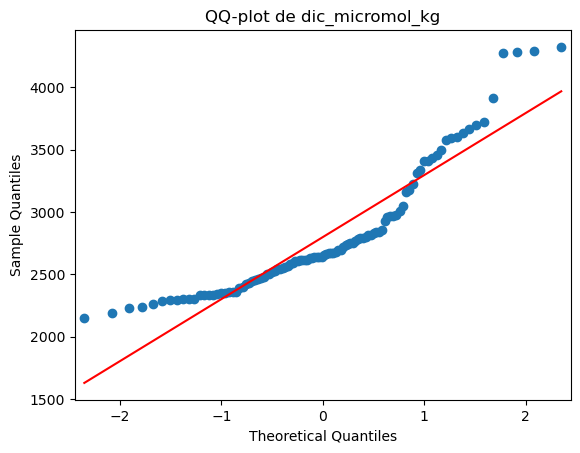


=== sal_psu ===


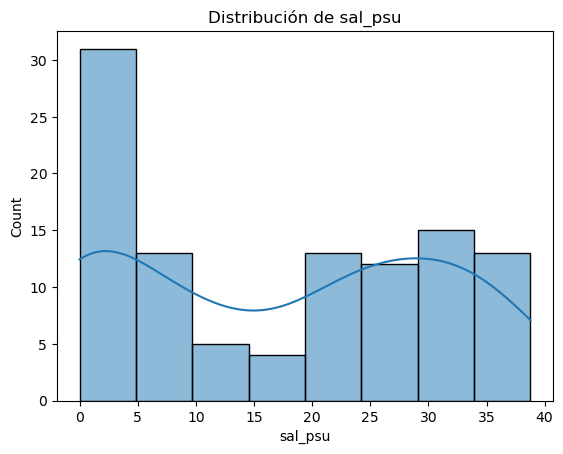

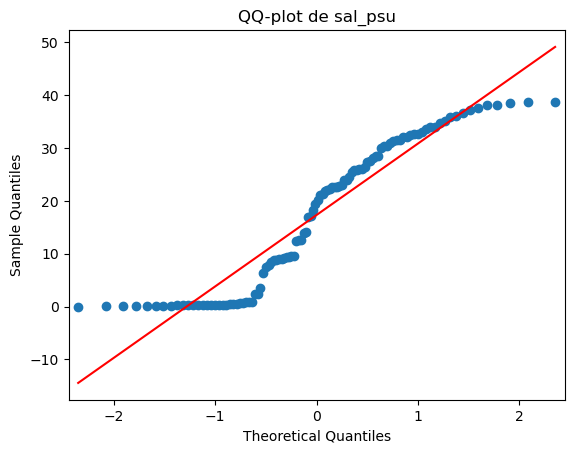

In [6]:
#Verificar qué tipo de distribución tienen los datos
# Variables de interés
variables = ["dic_micromol_kg", "sal_psu"]

for var in variables:
    print(f"\n=== {var} ===")
    data = df[var].dropna()

    # Histograma + densidad
    sns.histplot(data, kde=True)
    plt.title(f"Distribución de {var}")
    plt.show()

    # QQ-plot
    sm.qqplot(data, line="s")
    plt.title(f"QQ-plot de {var}")
    plt.show()


In [ ]:
#Se realiza prueba de Shapiro-Wilk para normalidad
    # Prueba Shapiro-Wilk
    stat, p = stats.shapiro(data.sample(min(5000, len(data))))  # muestra si es muy grande
    print(f"Shapiro-Wilk: estadístico={stat:.3f}, p={p:.3f}")

Shapiro-Wilk: estadístico=0.887, p=0.000


Shapiro-Wilk: estadístico=0.887, p=0.000 
Como p < 0.05 se rechaza la normalidad. 